In [1]:
import json
def getData(path="./eyeopen.json") -> dict:
    me={}
    with open(path, "r") as f:
        me=json.loads(f.read())
    return me
data=getData()
print(data.keys())

dict_keys(['ExperimentStartTimestampInMsUTC', 'ExperimentSequence', 'EEGData', 'EyeData', 'RealtimeEyeFreq', 'RealtimeEEGFreq', 'ExperimentEndTimestampInMsUTC'])


### 데이터 테이블
|제목|유형|설명|
|------|---|---|
|ExperimentStartTimestampInMsUTC|int(mstotime 사용)|실험 시작 시간|
|ExperimentSequence|int|n+1번째 실험|
|ExperimentEndTimestampInMsUTC|int(mstotime 사용)|실험 종료 시간|
|EEGData|dict|뇌파 데이터(아래 설명)|
|EyeData|dict|눈 추적 데이터(아래 설명)|
|RealtimeEyeFreq|dict(time:frequency)|눈 추적 데이터의 성능 지표(1초당 데이터 수집률)|
|RealtimeEEGFreq|dict(time:frequency)|뇌파 데이터의 성능 지표(1초당 데이터 수집률)|
### 메소드
mstotime 메소드는 ExperimentStartTimestampInMsUTC, ExperimentEndTimestampInMsUTC와 일부 timestamp에만 작동합니다. (밀리세컨드 시간을 한국 시간대로 바꾸는 메소드)
### 전체 데이터 기본 유형
|제목|유형|설명|
|------|---|---|
|timestamp|int(mstotime 사용)|시퀀스가 만들어진 시간|
|gametime|float|게임 내 시간 (게임 진행 시간)|
|OrdinaryDataFlag|bool|데이터 이상 여부(정상적인 상황일경우 True)|
|DataType|int(mstotime 사용)|데이터 종류 (ExtendedBrainInfo:EEG, ExtendedEyeData_v2:눈)|
|data|dict|시퀀스 데이터(아래 설명)|

In [4]:
from datetime import datetime, timedelta
def mstotime(ms):
    epoch = datetime(1970, 1, 1)
    return epoch+timedelta(milliseconds=ms)+timedelta(hours=9)
for i in data.keys():
    if i=="EEGData":
        print(i, data[i][0].keys())
    elif i=="EyeData":
        print(i, data[i][0].keys())
    elif i in ["RealtimeEyeFreq", "RealtimeEEGFreq"]:
        print(i, [i[1] for i in data[i].items()])
    elif i in ["ExperimentStartTimestampInMsUTC","ExperimentEndTimestampInMsUTC"]:
        #raw miliseconds are UTC time. KTC requires add 9 hours
        print(i, mstotime(data["ExperimentStartTimestampInMsUTC"]))
    else:
        print(i, data[i])




ExperimentStartTimestampInMsUTC 2022-08-04 11:15:54.133000
ExperimentSequence 0
EEGData dict_keys(['timestamp', 'gametime', 'OrdinaryDataFlag', 'DataType', 'data'])
EyeData dict_keys(['timestamp', 'gametime', 'OrdinaryDataFlag', 'DataType', 'data'])
RealtimeEyeFreq [120, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121, 120, 120, 120, 120, 120, 121]
RealtimeEEGFreq [558, 549, 558, 559, 501, 552, 538, 545, 503, 559, 557, 552, 560, 560, 559, 504, 568, 556, 545, 560, 553, 506, 499, 505, 550, 558, 551, 560, 558, 556, 503, 562, 499, 558, 496, 514, 561, 556, 511, 557, 557, 497, 504, 558, 557, 488, 560, 498, 5


### EEGData
|제목|유형|설명|
|------|---|---|
|MainTimestamp|float|EEGRawSignal의 Timestamp(뇌파 데이터가 Constructed 됬을때 당시에 찍힌 시간)|
|SeqTimestamp|float|EEGRawSignalData의 Timestamp(뇌파 데이터가 수집될 당시에 찍힌 시간)|
|SeqNumber|int|EEGRawSignalData의 seq_num|
|MainIterationSeqNum|int|EEGRawSignal이 가지고 있는 EEGRawSignalData를 분할할때 원본 EEGRawSignal의 iteration 순서|
|ChannelData|float[]|뇌파 데이터(AF3, AF4, Fp1, Fp2, AF7, AF8, +극?, -극?)|
|LastSensorData|dict|특정 채널의 센서가 얼굴에 잘 부착됐는지 여부|
### 뇌파 데이터
- https://looxidlabs.github.io/link-sdk/#/looxidlinkdata
- EEGRawSignalData은 하나의 채널 집합 데이터를 가지고 있음 (AF3, AF4, Fp1, Fp2, AF7, AF8)
- EEGRawSignal은 EEGRawSignalData의 List를 가지고 있었음
- 따라서 EEGRawSignal의 EEGRawSignalData List를 압축해제?시켜서 시퀀스 데이터로 만듬
- MainTimestamp는 EEGRawSignalData가 한꺼번에 모여진 시간대를 얘기함
- SeqTimestamp는 EEGRawSignalData가 하나하나 수집될때 찍힌 시간대로 추정
- 따라서 SeqTimeStamp가 더 세세함
### 알아봐야할 점
- MainTimestamp와 SeqTimestamp는 UTC 밀리세컨드 시간이랑 비슷한것 같은데 단위가 다른것 같아 어떤 단위를 사용하는지 찾아야 할 것 같음. (홈페이지에 X)
- ChannelData의 총 개수는 8개이지만 공식 SDK 홈페이지에서는 6채널이 순서대로 있다고 적혀 있음
- LastSensorData가 전부 True더라도 특정 채널의 값이 0.1875이면 제대로 캡처가 안됐을 가능성이 높음

In [ ]:
data["EEGData"][0]


{'timestamp': 1659275046650,
 'gametime': 43.48576,
 'OrdinaryDataFlag': True,
 'DataType': 'ExtendedBrainInfo',
 'data': {'MainTimestamp': 1659274975.4716277,
  'SeqTimestamp': 1659274974.937358,
  'SeqNumber': 0,
  'MainIterationSeqNum': 0,
  'ChannelData': [0.12408857036692743,
   0.13643853502732933,
   0.08592614065720328,
   0.05122908070434102,
   0.14822849908214797,
   0.1050032874945745,
   0.1875,
   0.0],
  'LastSensorData': {'AF3': True,
   'AF4': True,
   'Fp1': True,
   'Fp2': True,
   'AF7': True,
   'AF8': True}}}

뇌파 Raw data (쭉 내려가거나 완만한 커브 그래프면 정상)

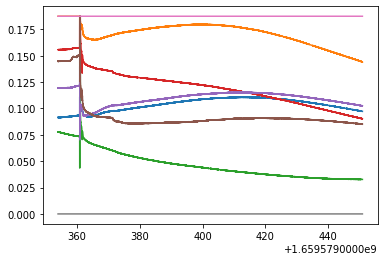

In [5]:
import matplotlib.pyplot as plt
eegdata=sorted(data["EEGData"],key=lambda k:k["data"]["SeqTimestamp"])
plt.plot([i["data"]["SeqTimestamp"] for i in eegdata], [i["data"]["ChannelData"] for i in eegdata])


### EyeData
|제목|유형|설명|
|------|---|---|
|isThereUserInFrontOfHMD|bool|유저가 VR을 끼고 있는지 아닌지 여부(눈이 감지됐는지)(맞으면 True)|
|FrameSequence|int|EyeData_v2 원본 데이터의 framesequence|
|TimestampInMs|int|EyeData_v2 원본 데이터의 timestamp|
|verbose_data|dict|gaze_origin_mm, gaze_direction, pupil_diameter, eye_openness, pupil_position (왼쪽, 오른쪽, 중간)|
|expression_data|dict|찡그리기, 눈 번쩍뜨기등 아바타 구현에 필요한 데이터|
|RayFocusData|dict|쳐다본 물체의 위치, 이름, 태그등 (왼쪽, 오른쪽, 중간)|

In [6]:
data["EyeData"][0]["data"].keys()

dict_keys(['isThereUserInFrontOfHMD', 'FrameSequence', 'TimestampInMs', 'verbose_data', 'expression_data', 'RayFocusData'])

In [7]:
for k, v in data["EyeData"][300]["data"].items():
    if k in ["isThereUserInFrontOfHMD", "FrameSequence", "TimestampInMs"]:
        print(k,v)

isThereUserInFrontOfHMD True
FrameSequence 26968
TimestampInMs 3040580


### Veborse Data
|제목|유형|설명|
|------|---|---|
|eye_data_validata_bit_mask|int|해당 시퀀스 값의 유효성을 나타내는 bit (The bits containing all validity for this frame.)|
|gaze_origin_mm|float[](vec3)|쳐다보는 각도를 구할때 원점 (The point in the eye from which the gaze ray originates in millimeter.(right-handed coordinate system))|
|gaze_direction_normalized|float[](vec3)|노말라이즈드 됀 gaze 벡터 (The normalized gaze direction of the eye in [0,1].(right-handed coordinate system))|
|pupil_diameter_mm|float|동공의 크기(The diameter of the pupil in millimeter)|
|eye_openness|float|눈이 열린 정도|
|pupil_position_in_sensor_area|float[](vec2)|동콩 위치(The normalized position of a pupil in [0,1])|
### 추가 설명
- left, right는 각각 왼쪽, 오른쪽 눈의 데이터를 얘기함
- Combined는 왼쪽 눈과 오른쪽 눈의 중간을 계산해 나온 데이터를 얘기함
- 관련 추가 설명은 https://developer-express.vive.com/resources/vive-sense/eye-and-facial-tracking-sdk/documentation/ 참고 (namespaces -> Eye -> EyeData_v2)<br>
![눈 이미지](EyeData.png)

In [8]:
data["EyeData"][300]["data"]["verbose_data"]

{'left': {'eye_data_validata_bit_mask': 31,
  'gaze_origin_mm': [32.9012146, 2.71878052, -33.4886932],
  'gaze_direction_normalized': [-0.02468872, -0.09124756, 0.9955139],
  'pupil_diameter_mm': 3.17526245,
  'eye_openness': 1.0,
  'pupil_position_in_sensor_area': [0.481754452, 0.5385293]},
 'right': {'eye_data_validata_bit_mask': 31,
  'gaze_origin_mm': [-30.2095032, 2.7089386, -35.697937],
  'gaze_direction_normalized': [-0.008239746, -0.07310486, 0.997283936],
  'pupil_diameter_mm': 3.0065155,
  'eye_openness': 1.0,
  'pupil_position_in_sensor_area': [0.47123462, 0.551500857]},
 'combined': {'eye_data_validata_bit_mask': 3,
  'gaze_origin_mm': [2.084732, 2.713974, -34.5674438],
  'gaze_direction_normalized': [-0.0166625977, -0.08239746, 0.9964447],
  'pupil_diameter_mm': 0.0,
  'eye_openness': 0.0,
  'pupil_position_in_sensor_area': [0.0, 0.0],
  'convergence_distance_validity': False,
  'convergence_distance_mm': 0.0}}

### Ray Focus Data
|제목|유형|설명|
|------|---|---|
|ColidedObjectPosition|float[](vec3)|쳐다보는 위치에 있는 물체의 좌표(쳐다보는 좌표X)|
|ColidedObjectTag|string|쳐다보는 위치에 있는 물체의 유니티 태그|
|ColidedObjectName|string|쳐다보는 위치에 있는 물체의 이름|
|SceneOfColidedObject|string|물체가 위치해 있는 씬의 이름|
|ColidedObjectLayer|int|쳐다보는 위치에 있는 물체의 유니티 레이어|
|RayOriginPos|float[](vec3)|계산할때 사용한 눈의 위치 원점(유니티 좌표계)|
|RayDirectionPos|float[](vec3)|계산할때 사용한 눈위 위치로부터 출발한 각도 (벡터)|
|Validaty|bool|해당 값이 유효한지 아닌지의 여부(True가 아닐경우 안의 내용은 전부 무효)|
### 추가 정보
- 왼쪽, 오른쪽, 가운데 정보가 있음.

In [13]:
data["EyeData"][2335]["data"]["RayFocusData"]

{'left': {'Data': {'ColidedObjectPosition': [0.0, 0.0, 0.0],
   'ColidedObjectTag': 'Undefined',
   'ColidedObjectName': 'Undefined',
   'SceneOfColidedObject': 'Undefined',
   'ColidedObjectLayer': -9999,
   'RayOriginPos': [0.0, 0.0, 0.0],
   'RayDirectionPos': [0.0, 0.0, 0.0]},
  'Validaty': False},
 'right': {'Data': {'ColidedObjectPosition': [7.661859, 1.873301, 2.77432919],
   'ColidedObjectTag': 'Untagged',
   'ColidedObjectName': 'Brain_Part_04',
   'SceneOfColidedObject': 'SampleScene',
   'ColidedObjectLayer': 0,
   'RayOriginPos': [0.030585466, 0.0009073029, -0.0348689444],
   'RayDirectionPos': [0.187470347, 0.0390016474, 0.9814957]},
  'Validaty': True},
 'combined': {'Data': {'ColidedObjectPosition': [7.661859,
    1.873301,
    2.77432919],
   'ColidedObjectTag': 'Untagged',
   'ColidedObjectName': 'Brain_Part_04',
   'SceneOfColidedObject': 'SampleScene',
   'ColidedObjectLayer': 0,
   'RayOriginPos': [-0.0303869639, 0.000906906149, -0.03486635],
   'RayDirectionPos': [

In [12]:
print("leftValidity:",len([i for ind, i in enumerate(data["EyeData"]) if i["data"]["RayFocusData"]["left"]["Data"]["ColidedObjectName"]!='Undefined']))
print("rightValidity:",len([i for ind, i in enumerate(data["EyeData"]) if i["data"]["RayFocusData"]["right"]["Data"]["ColidedObjectName"]!='Undefined']))
print("combinedValidity:",len([i for ind, i in enumerate(data["EyeData"]) if i["data"]["RayFocusData"]["combined"]["Data"]["ColidedObjectName"]!='Undefined']))
print([(i,ind) for ind, i in enumerate(data["EyeData"]) if i["data"]["RayFocusData"]["combined"]["Data"]["ColidedObjectName"]!='Undefined'][0])

leftValidity: 4664
rightValidity: 4716
combinedValidity: 4700
({'timestamp': 1659579373592, 'gametime': 40.8197365, 'OrdinaryDataFlag': True, 'DataType': 'ExtendedEyeData_v2', 'data': {'isThereUserInFrontOfHMD': True, 'FrameSequence': 29003, 'TimestampInMs': 3057535, 'verbose_data': {'left': {'eye_data_validata_bit_mask': 31, 'gaze_origin_mm': [32.4346, 0.719909668, -33.8698273], 'gaze_direction_normalized': [-0.187728882, 0.03590393, 0.9815521], 'pupil_diameter_mm': 2.89082336, 'eye_openness': 1.0, 'pupil_position_in_sensor_area': [0.5271997, 0.5889091]}, 'right': {'eye_data_validata_bit_mask': 31, 'gaze_origin_mm': [-30.5757751, 0.847732544, -34.8711243], 'gaze_direction_normalized': [-0.1932373, 0.0395813, 0.9803467], 'pupil_diameter_mm': 2.940796, 'eye_openness': 1.0, 'pupil_position_in_sensor_area': [0.5178189, 0.589900255]}, 'combined': {'eye_data_validata_bit_mask': 3, 'gaze_origin_mm': [-30.51445, 0.8475952, -34.8701477], 'gaze_direction_normalized': [-0.193222046, 0.0395813, 0